# Visualization of Network architecture

In [7]:
import torch
import hiddenlayer as hl
# TODO: Fix in jupyter lab, currently only works in PyCharm
from uncertainty_modeling.vnet_module import VNet

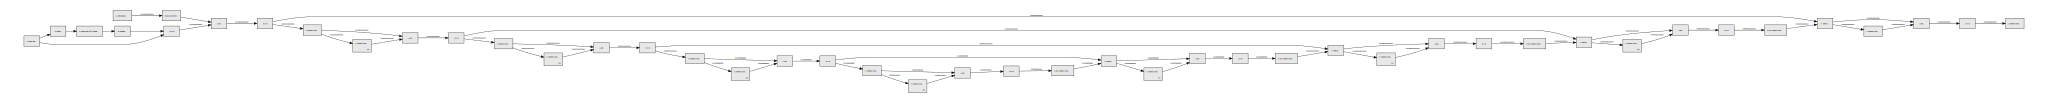

In [9]:
model = VNet()

transforms = [
    # Fold Conv, BN, RELU layers into one
    hl.transforms.Fold("Conv > BatchNorm > Elu", None, name="ConvBlock"),
    hl.transforms.Fold("Conv > BatchNorm > PRelu", None, name="ConvBlock"),
    hl.transforms.Fold("ConvTranspose > BatchNorm > Elu", None, name="UpConvBlock"),
    hl.transforms.Fold("ConvTranspose > BatchNorm > PRelu", None, name="UpConvBlock"),
    hl.transforms.Prune("Unsqueeze"),
    hl.transforms.FoldDuplicates()
]

# Build HiddenLayer graph
# Jupyter Notebook renders it automatically
hl_graph = hl.build_graph(model, torch.zeros([1, 1, 64, 64, 64]), transforms=transforms)
hl_graph